In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')

In [4]:
df.shape

(9134, 24)

In [5]:
df.head(3)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize


In [6]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [7]:
df.groupby('Gender').count()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
Gender,,,,,,,,,,,,,,,,,,,,,
F,4658,4658,4658,4658,4658,4658,4658,4658,4658,4658,...,4658,4658,4658,4658,4658,4658,4658,4658,4658,4658
M,4476,4476,4476,4476,4476,4476,4476,4476,4476,4476,...,4476,4476,4476,4476,4476,4476,4476,4476,4476,4476


In [8]:
df.groupby(['Response','Gender']).count()

Customer  State  Customer Lifetime Value  Coverage  \
Response Gender                                                       
No       F           3998   3998                     3998      3998   
         M           3828   3828                     3828      3828   
Yes      F            660    660                      660       660   
         M            648    648                      648       648   

                 Education  Effective To Date  EmploymentStatus  Income  \
Response Gender                                                           
No       F            3998               3998              3998    3998   
         M            3828               3828              3828    3828   
Yes      F             660                660               660     660   
         M             648                648               648     648   

                 Location Code  Marital Status      ...       \
Response Gender                                     ...        
No       F                3998            3998      ...        
         M                3828            3828      ...        
Yes      F                 660             660      ...        
         M                 648             648      ...        

                 Months Since Policy Inception  Number of Open Complaints  \
Response Gender                                                             
No       F                                3998                       3998   
         M                                3828                       3828   
Yes      F                                 660                        660   
         M                                 648                        648   

                 Number of Policies  Policy Type  Policy  Renew Offer Type  \
Response Gender                                                              
No       F                     3998         3998    3998              3998   
         M                     3828         3828    3828              3828   
Yes      F                      660          660     660               660   
         M                      648          648     648               648   

                 Sales Channel  Total Claim Amount  Vehicle Class  \
Response Gender                                                     
No       F                3998                3998           3998   
         M                3828                3828           3828   
Yes      F                 660                 660            660   
         M                 648                 648            648   

                 Vehicle Size  
Response Gender                
No       F               3998  
         M               3828  
Yes      F                660  
         M                648  

[4 rows x 22 columns]

Text(0, 0.5, 'Count')

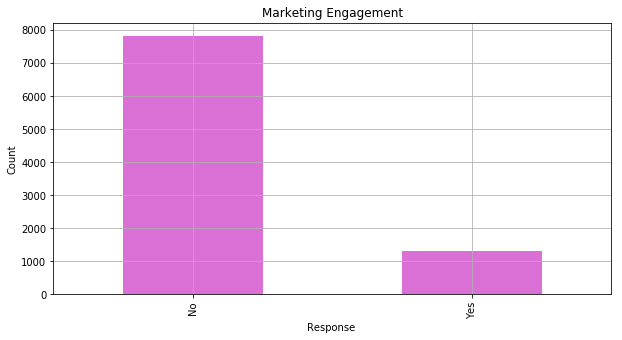

In [9]:
ax = df.groupby('Response').count()['Customer'].plot(
kind='bar',
color='orchid',
grid=True,
figsize=(10, 5),
title='Marketing Engagement'
)
ax.set_xlabel("Response ")
ax.set_ylabel("Count")

AxesSubplot(0.260833,0.125;0.503333x0.755)


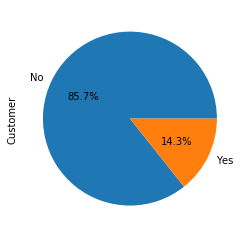

In [22]:
#df.groupby('Response').count()['Customer'] Here "Customer can be replaced with any other column name"
ax = df.groupby('Response').count()['Customer'].plot(kind='pie',autopct='%.1f%%')
print(ax)

In [11]:
by_offer_type_df = df.loc[df['Response'] == 'Yes', # count only engaged customers
                         ].groupby([
'Renew Offer Type'
    # engaged customers grouped by renewal offer type
]).count()['Customer'] / df.groupby('Renew Offer Type').count()['Customer']
by_offer_type_df

Renew Offer Type
Offer1    0.158316
Offer2    0.233766
Offer3    0.020950
Offer4         NaN
Name: Customer, dtype: float64

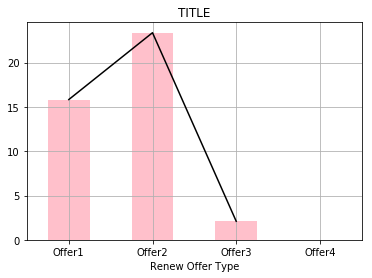

In [12]:
odf=(df.loc[df['Response']=="Yes"].groupby(['Renew Offer Type']).count()['Customer']/df.groupby('Renew Offer Type').count()['Customer'])*100
odf.plot(kind='bar',title="TITLE",color="pink")
odf.plot(kind='line',color='black',grid=True)

In [13]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


AttributeError: 'DataFrame' object has no attribute 'set_ylabel'

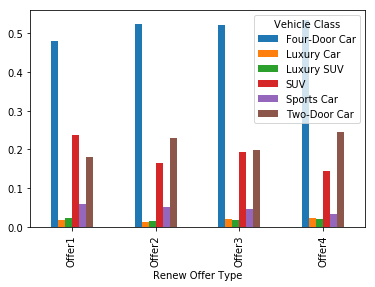

In [14]:
ax=df.groupby(["Renew Offer Type","Vehicle Class"]).count()['Customer']/df.groupby('Renew Offer Type').count()['Customer']
ax=ax.unstack().fillna(0)
ax.plot(kind='bar')
ax.set_ylabel('Engagement Rate (%)')

In [15]:
df.groupby('Sales Channel').count()["Customer"]

Sales Channel
Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: Customer, dtype: int64

In [16]:
by_sales_channel_df = df.loc[df['Response'] == 'Yes'].groupby(['Sales Channel']).count()['Customer']/df.groupby('Sales Channel').count()['Customer']
by_sales_channel_df

Sales Channel
Agent          0.191544
Branch         0.114531
Call Center    0.108782
Web            0.117736
Name: Customer, dtype: float64

In [17]:
df[["Coverage","Gender"]].head(6)

,Coverage,Gender
0,Basic,F
1,Extended,F
2,Premium,F
3,Basic,M
4,Basic,M
5,Basic,F


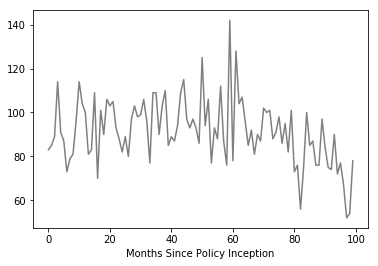

In [18]:
bins=[0,25,50,75,100]
df.groupby('Months Since Policy Inception')["Customer"].count().plot(color="grey")


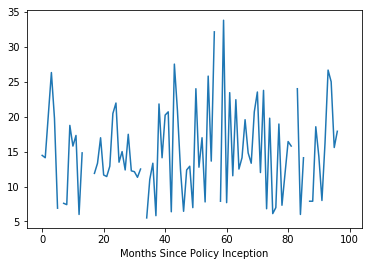

In [19]:
by_months_since_inception_df = df.loc[
df['Response'] == 'Yes'
].groupby(
by='Months Since Policy Inception'
)['Response'].count() / df.groupby(
by='Months Since Policy Inception'
)['Response'].count() * 100.0
by_months_since_inception_df.plot()

In [20]:
#df.groupby(by='Months Since Policy Inception')['Response'].count()
df.loc[df['Response'] == 'Yes'].groupby(by='Months Since Policy Inception')['Response'].count().plot.scatter()

AttributeError: 'SeriesPlotMethods' object has no attribute 'scatter'

In [ ]:
df.loc[
(df['CLV Segment'] == 'Low') & (df['Policy Age Segment'] == 'Low')
].plot.scatter(
color='green',
grid=True,
figsize=(10, 7)
)

In [ ]:
df.groupby('Response')['Months Since Policy Inception'].count().plot(kind='scatter')
#df.loc[df['Response'] == 'Yes'].groupby(by='Months Since Policy Inception')['Response'].count()

In [ ]:
df['Customer Lifetime Value'].describe()

In [ ]:
df['Policy Age Segment'] = df['Months Since Policy Inception'].apply(
lambda x: 'High' if x > df['Months Since Policy Inception'].median() else 'Low'
)
df

In [ ]:
df['CLV Segment'] = df['Customer Lifetime Value'].apply(lambda x: 'High' if x > df['Customer Lifetime Value'].median() else 'Low')
df['CLV Segment']
df

In [ ]:
ax = df.loc[(df['CLV Segment'] == 'High') & (df['Policy Age Segment'] == 'High')].plot.scatter(x='Months Since Policy Inception',y='Customer Lifetime Value',logy=True,color='red',figsize=(20,12))
df.loc[(df['CLV Segment'] == 'Low') & (df['Policy Age Segment'] == 'High')].plot.scatter(ax=ax,x='Months Since Policy Inception',y='Customer Lifetime Value',logy=True,color='blue')
df.loc[(df['CLV Segment'] == 'High') & (df['Policy Age Segment'] == 'Low')].plot.scatter(ax=ax,x='Months Since Policy Inception',y='Customer Lifetime Value',logy=True,color='orange')


In [ ]:
df.loc[(df['CLV Segment'] == 'Low') & (df['Policy Age Segment'] == 'High')].plot.scatter(x='Months Since Policy Inception',y='Customer Lifetime Value',logy=True,color='blue')